In [1]:
print('running')

running


In [2]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [3]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

## Import modules from parent and multimode expts

In [4]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: c:\_Lib\python\multimode_expts


In [5]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [6]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [7]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Exp path

In [8]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

data_parent_path = r'H:\Shared drives\SLab\Multimode\experiment\240911'

expt_path=data_parent_path+'\\data'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data


In [9]:
from dataset import *
from dataset import storage_man_swap_dataset
import os 

file_name = '\\man1_storage_swap_dataset.csv'
file_path = parent_path + file_name

ds = storage_man_swap_dataset(file_path)

In [10]:
ds.df

,stor_name,freq (MHz),precision (MHz),pi (mus),h_pi (mus),gain (DAC units),last_update
0,M1-S1,349.660,0.03,0.942926,0.465943,3000,2025-01-21 16:12:51.119011
1,M1-S2,521.230,0.05,1.069160,0.531718,5000,2025-01-21 16:17:17.763411
2,M1-S3,696.980,0.03,1.256963,0.613370,9000,2025-01-21 16:17:39.113328
3,M1-S4,876.380,0.03,1.235632,0.622603,9000,2025-01-21 16:17:54.523998
4,M1-S5,1053.950,0.03,1.882097,0.985547,7500,2025-01-21 16:18:31.141469
5,M1-S6,1245.525,0.03,1.500950,0.732998,13500,2025-01-21 16:32:20.759195
6,M1-S7,1423.275,0.03,2.153588,1.085899,10000,2025-01-21 16:32:02.177572
7,M1-S8,-1.000,-1.00,-1.000000,-1.000000,-1,51:31.3
8,M1-S9,-1.000,-1.00,-1.000000,-1.000000,-1,51:31.3
9,M1-S10,-1.000,-1.00,-1.000000,-1.000000,-1,51:31.3


In [11]:
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\matplotlib\\pyplot.py'>

# QUBIT RB 
Location:
\multimode\Multimode\experiment\240205\single_qubit_sandbox.ipynb

Single QB RB 


 rb_single.cfg.expt = dict(
        qubit=0,
        singleshot_reps = 5000,   # single shot measurement repetitions
        span=50,   # single shot plot span
        reps=500,
        rounds=10,
        variations = 20,   # number of different sequences
        rb_depth = depth,    # rb sequence depth
        IRB_gate_no = -1   # IRB gate number, -1 means not using
    )

<ErrorbarContainer object of 3 artists>

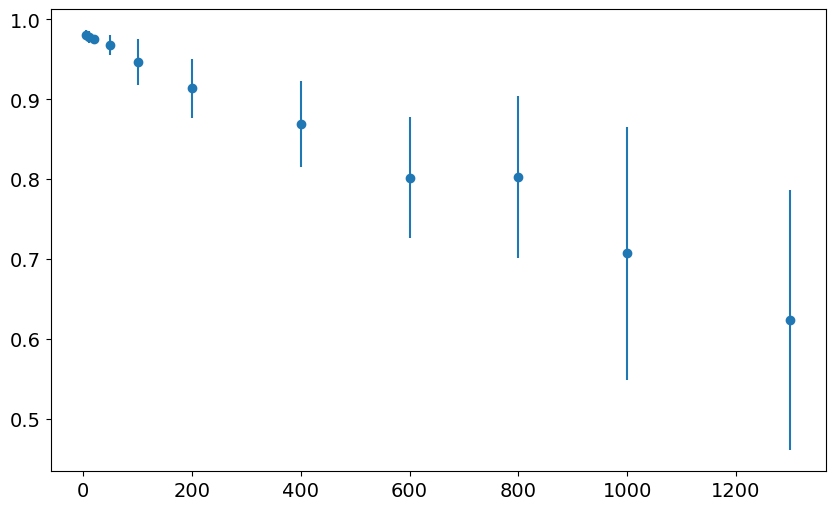

In [16]:
gate_depths = [5,10,20,50,100,200,400,600, 800,1000,1300]
survival_probs = [ [0.986, 0.988, 0.974, 0.982, 0.99, 0.982, 0.976, 0.978, 0.988, 0.984, 0.982, 0.972, 0.978, 0.968, 0.978, 0.982, 0.982, 0.98, 0.984, 0.984], 
                    [0.986, 0.978, 0.988, 0.974, 0.982, 0.972, 0.968, 0.992, 0.976, 0.98, 0.972, 0.976, 0.976, 0.988, 0.964, 0.982, 0.974, 0.974, 0.988, 0.966],
                    [0.98, 0.968, 0.974, 0.974, 0.968, 0.974, 0.976, 0.976, 0.982, 0.986, 0.982, 0.966, 0.98, 0.978, 0.978, 0.978, 0.972, 0.974, 0.972, 0.98],
                    [0.972, 0.948, 0.97, 0.964, 0.956, 0.952, 0.992, 0.984, 0.956, 0.946, 0.97, 0.974, 0.974, 0.976, 0.96, 0.994, 0.962, 0.964, 0.97, 0.972],
                    [0.96, 0.958, 0.972, 0.954, 0.928, 0.946, 0.968, 0.962, 0.94, 0.966, 0.942, 0.928, 0.922, 0.942, 0.95, 0.968, 0.966, 0.928, 0.984, 0.844],#/
                    [0.95, 0.972, 0.934, 0.934, 0.846, 0.904, 0.844, 0.888, 0.9, 0.924, 0.92, 0.844, 0.948, 0.894, 0.946, 0.936, 0.898, 0.906, 0.964, 0.924],
                    [0.876, 0.894, 0.88, 0.896, 0.842, 0.862, 0.93, 0.752, 0.888, 0.774, 0.77, 0.874, 0.85, 0.898, 0.872, 0.956, 0.838, 0.942, 0.852, 0.936],
                    [0.904, 0.83, 0.798, 0.832, 0.854, 0.728, 0.848, 0.74, 0.892, 0.71, 0.816, 0.932, 0.804, 0.828, 0.696, 0.708, 0.71, 0.74, 0.736, 0.936],
                    [0.876, 0.844, 0.844, 0.836, 0.76, 0.688, 0.432, 0.858, 0.812, 0.886, 0.776, 0.908, 0.776, 0.906, 0.802, 0.828, 0.874, 0.758, 0.826, 0.758],
                    [0.83, 0.424, 0.25, 0.712, 0.584, 0.758, 0.846, 0.708, 0.808, 0.462, 0.782, 0.816, 0.644, 0.796, 0.728, 0.824, 0.748, 0.708, 0.868, 0.848],
                     [0.508, 0.688, 0.584, 0.396, 0.762, 0.758, 0.854, 0.458, 0.838, 0.642, 0.726, 0.748, 0.56, 0.622, 0.45, 0.51, 0.304, 0.796, 0.85, 0.424]]

mean_survival_probs = np.mean(survival_probs, axis=1)
std_survival_probs = np.std(survival_probs, axis=1)

plt.errorbar(gate_depths, mean_survival_probs, yerr=std_survival_probs, fmt='o')

Optimal parameters: m = -0.0003120477505753345, b = 0.0011134210201451265
m_err = 5.651698700659205e-05, b_err = 0.0033928087946859978


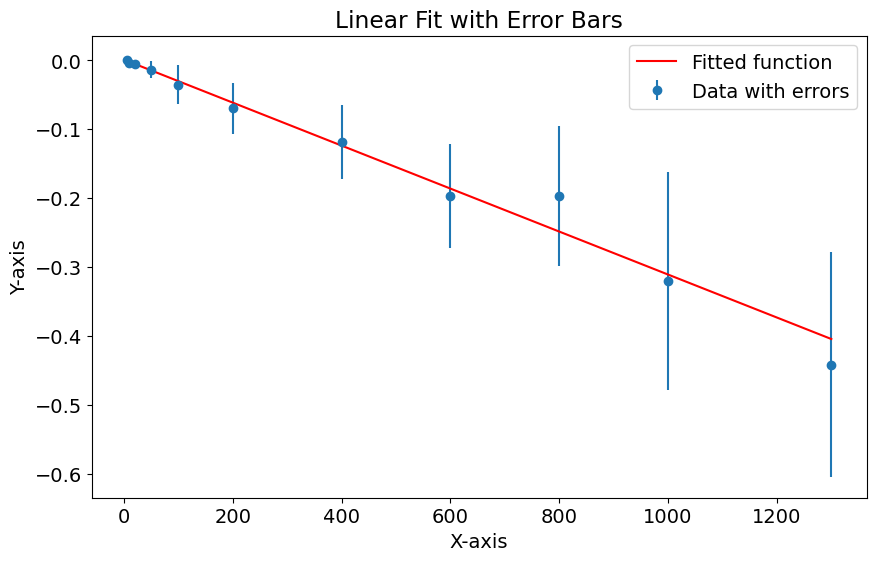

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linear_fit_with_errors(x_data, y_data, y_errors):
    """
    Fit data with a linear function and plot the results with error bars.

    Parameters:
    x_data (array-like): The x-coordinates of the data points.
    y_data (array-like): The y-coordinates of the data points.
    y_errors (array-like): The errors in the y-coordinates of the data points.

    Returns:
    None
    """
    # Define the linear function
    def linear(x, m, b):
        return m * x + b

    # Initial parameter guesses
    initial_params = [1, 1]

    # Fit the linear function to the data
    popt, pcov = curve_fit(linear, x_data, y_data, p0=initial_params, sigma=y_errors, absolute_sigma=True)

    # Extract the optimal parameters
    m_opt, b_opt = popt

    # Print the optimal parameters
    print(f"Optimal parameters: m = {m_opt}, b = {b_opt}")

    # Calculate the errors in the parameters
    m_err = np.sqrt(pcov[0][0])
    b_err = np.sqrt(pcov[1][1])
    print(f"m_err = {m_err}, b_err = {b_err}")

    # Plot the data and the fitted function
    plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data with errors')
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = linear(x_fit, *popt)
    plt.plot(x_fit, y_fit, label='Fitted function', color='red')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Linear Fit with Error Bars')
    plt.legend()
    plt.show()
    return m_opt, b_opt, m_err, b_err

# Example usage
x_data = gate_depths #np.linspace(0, 10, 100)
y_offset = 1 - mean_survival_probs[0]
y_data = np.log(mean_survival_probs[:end_idx] +  y_offset)#2 * np.exp(-0.5 * x_data) + 1 + np.random.normal(0, 0.2, x_data.size)
y_errors = std_survival_probs[:end_idx]
return_args = linear_fit_with_errors(x_data, y_data, y_errors)

In [39]:
m, b, m_err, b_err = return_args
r = -1 / m
r_err = np.abs(m_err / m**2)
r_fid = np.exp(-1 / r)
r_fid_err = np.exp(-1 / r) * r_err / (r**2)
print(f"r = {r}, r_err = {r_err}")
print(f"r_fid = {r_fid}, r_fid_err = {r_fid_err}")

depol_threshold = (1 + r_fid) / 2
depol_threshold_err = r_fid_err / 2
print(f"Depolarizing threshold = {depol_threshold}, depol_threshold_err = {depol_threshold_err}")

r = 3204.6377458458246, r_err = 580.4126756525931
r_fid = 0.9996880009312602, r_fid_err = 5.6499353759278004e-05
Depolarizing threshold = 0.9998440004656302, depol_threshold_err = 2.8249676879639002e-05


C:\Users\26049\AppData\Local\Temp\ipykernel_20844\1701895993.py:18: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c


Optimal parameters: a = 505.98192471369396, b = -5.258572459222467e-07, c = -505.0037092429892
r = 1901656.7856666183, r_err = 909586742.9557259
r_fid = 0.9999994741428924, r_fid_err = 0.0002515241086925363


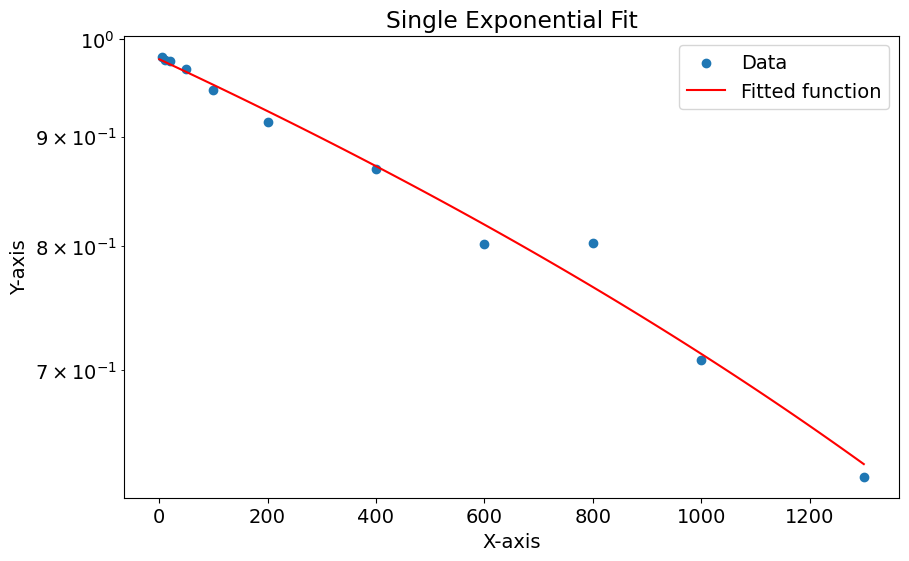

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def single_exponential_fit(x_data, y_data):
    """
    Fit data with a single exponential function and plot the results.

    Parameters:
    x_data (array-like): The x-coordinates of the data points.
    y_data (array-like): The y-coordinates of the data points.

    Returns:
    None
    """
    # Define the single exponential function
    def single_exponential(x, a, b, c):
        return a * np.exp(b * x) + c

    # Fit the single exponential function to the data
    popt, pcov = curve_fit(single_exponential, x_data, y_data, p0=[1, -1, 1], maxfev=10000)

    # Extract the optimal parameters
    a_opt, b_opt, c_opt = popt

    # Print the optimal parameters
    print(f"Optimal parameters: a = {a_opt}, b = {b_opt}, c = {c_opt}")

    # Convert b to gates
    r = 1 / np.abs(b_opt)
    r_err = np.abs(np.sqrt(pcov[1][1]) / b_opt**2)
    print(f"r = {r}, r_err = {r_err}")

    # Calculate the fidelity
    r_fid = np.exp(-1 / r)
    r_fid_err = np.exp(-1 / r) * r_err / (r**2)
    print(f"r_fid = {r_fid}, r_fid_err = {r_fid_err}")

    # Plot the data and the fitted function
    plt.scatter(x_data, y_data, label='Data')
    x_fit = np.linspace(0, max(x_data), 100)
    y_fit = single_exponential(x_fit, *popt)
    plt.plot(x_fit, y_fit, label='Fitted function', color='red')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.yscale('log')
    plt.title('Single Exponential Fit')
    plt.legend()
    plt.show()

# Example usage
xlist = gate_depths
ylist = mean_survival_probs
single_exponential_fit(xlist, ylist)

In [14]:
len(mean_survival_probs)

10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def single_exponential_fit_with_errors(x_data, y_data, y_errors):
    """
    Fit data with a single exponential function and plot the results with error bars.

    Parameters:
    x_data (array-like): The x-coordinates of the data points.
    y_data (array-like): The y-coordinates of the data points.
    y_errors (array-like): The errors in the y-coordinates of the data points.

    Returns:
    None
    """
    # Define the single exponential function
    def single_exponential(x, a, b, c):
        return a * np.exp(b * x) + c

    # Initial parameter guesses
    initial_params = [1, -1, 1]

    # Define bounds for the parameters
    lower_bounds = [0, -np.inf, 0]
    upper_bounds = [np.inf, 0, np.inf]

    # Fit the single exponential function to the data
    popt, pcov = curve_fit(single_exponential, x_data, y_data, p0=initial_params, bounds=(lower_bounds, upper_bounds), sigma=y_errors, absolute_sigma=True, maxfev=10000)

    # Extract the optimal parameters
    a_opt, b_opt, c_opt = popt

    # Print the optimal parameters
    print(f"Optimal parameters: a = {a_opt}, b = {b_opt}, c = {c_opt}")
    print(f"Error on optimal parameters: {np.sqrt(np.diag(pcov))}")

    # Convert b to gates
    r = 1 / np.abs(b_opt)
    r_err = np.abs(np.sqrt(pcov[1][1]) / b_opt**2)
    print(f"r = {r}, r_err = {r_err}")

    # Calculate the fidelity
    r_fid = np.exp(-1 / r)
    r_fid_err = np.exp(-1 / r) * r_err / (r**2)
    print(f"r_fid = {r_fid}, r_fid_err = {r_fid_err}")

    # Plot the data and the fitted function
    plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data with errors')
    x_fit = np.linspace(0, max(x_data), 100)
    y_fit = single_exponential(x_fit, *popt)
    plt.plot(x_fit, y_fit, label='Fitted function', color='red')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.yscale('log')
    plt.xscale('log')
    plt.title('Single Exponential Fit with Error Bars')
    plt.legend()
    plt.show()

# Example usage
end_idx = None
x_data = gate_depths[:end_idx] #np.linspace(0, 10, 100)
y_data = mean_survival_probs[:end_idx] +  0.10278248936355014#2 * np.exp(-0.5 * x_data) + 1 + np.random.normal(0, 0.2, x_data.size)
y_errors = std_survival_probs[:end_idx]#np.random.normal(0.1, 0.02, x_data.size)
single_exponential_fit_with_errors(x_data, y_data, y_errors)